In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

In [2]:
# Cargar el CSV
results_df = pd.read_csv("energy_results.csv")

# Asegurar que las columnas necesarias existen y están en el tipo correcto
results_df['día'] = results_df['día'].astype(int)

# Agregar columnas de semana, mes y año
results_df['semana'] = results_df['día'] // 7
results_df['mes'] = (results_df['día'] % 365) // 30
results_df['año'] = results_df['día'] // 365

# Agrupaciones
semanal = results_df.groupby('semana').sum().reset_index()
mensual = results_df.groupby('mes').sum().reset_index()
anual = results_df.groupby('año').sum().reset_index()

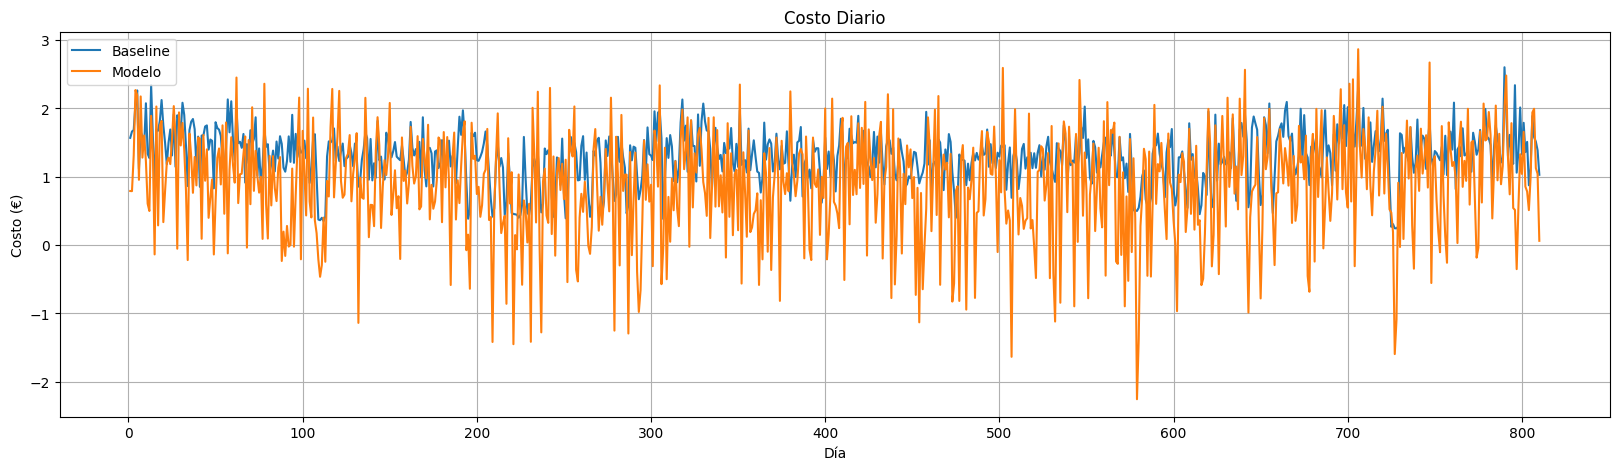

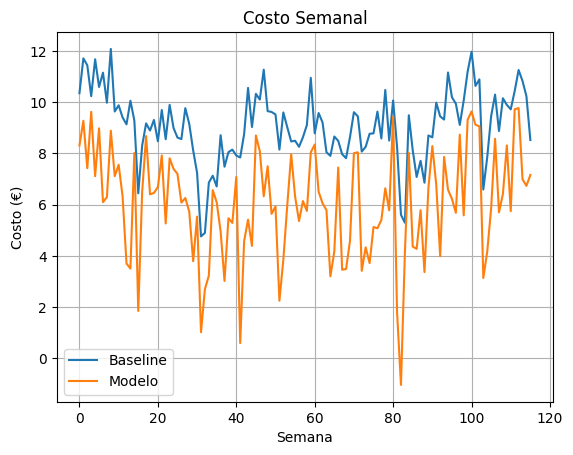

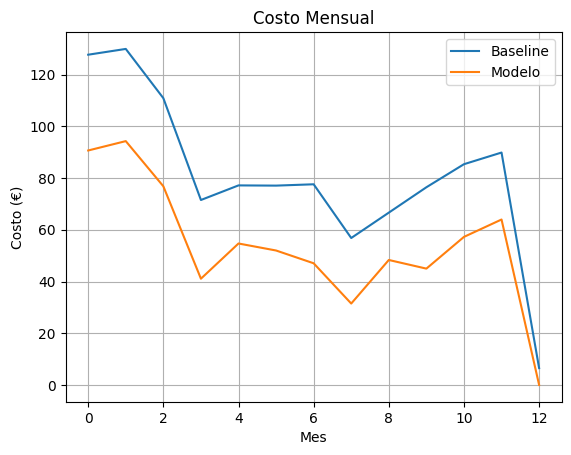

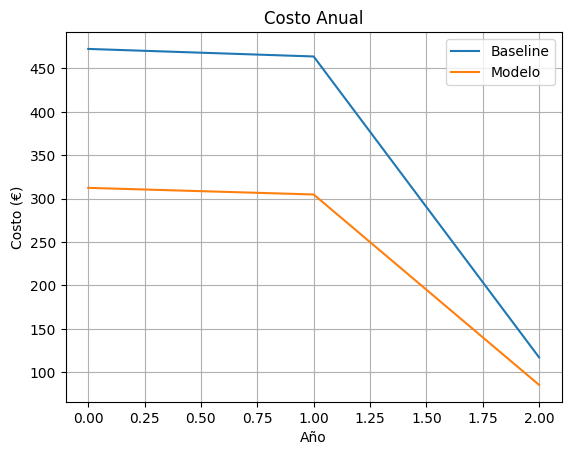

In [3]:
# Gráfica diaria
plt.figure(figsize=(20, 5))
plt.plot(results_df['día'], results_df['baseline'], label='Baseline')
plt.plot(results_df['día'], results_df['modelo'], label='Modelo')
plt.title("Costo Diario")
plt.xlabel("Día")
plt.ylabel("Costo (€)")
plt.legend()
plt.grid(True)
plt.show()

# Gráfica semanal
plt.figure()
plt.plot(semanal['semana'], semanal['baseline'], label='Baseline')
plt.plot(semanal['semana'], semanal['modelo'], label='Modelo')
plt.title("Costo Semanal")
plt.xlabel("Semana")
plt.ylabel("Costo (€)")
plt.legend()
plt.grid(True)
plt.show()

# Gráfica mensual
plt.figure()
plt.plot(mensual['mes'], mensual['baseline'], label='Baseline')
plt.plot(mensual['mes'], mensual['modelo'], label='Modelo')
plt.title("Costo Mensual")
plt.xlabel("Mes")
plt.ylabel("Costo (€)")
plt.legend()
plt.grid(True)
plt.show()

# Gráfica anual
plt.figure()
plt.plot(anual['año'], anual['baseline'], label='Baseline')
plt.plot(anual['año'], anual['modelo'], label='Modelo')
plt.title("Costo Anual")
plt.xlabel("Año")
plt.ylabel("Costo (€)")
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# Selección interactiva de mes y año
años_disponibles = sorted(results_df['año'].unique())
meses_disponibles = list(range(12))  # de 0 a 11

selector_año = widgets.Dropdown(options=años_disponibles, description='Año:')
selector_mes = widgets.Dropdown(options=meses_disponibles, description='Mes:')

# Función para graficar por mes y año
def actualizar_grafica(año, mes):
    filtro = (results_df['año'] == año) & (results_df['mes'] == mes)
    df_filtrado = results_df[filtro]

    if df_filtrado.empty:
        print(f"No hay datos para Mes {mes + 1}, Año {año + 1}")
        return

    plt.figure(figsize=(12, 5))
    plt.plot(df_filtrado['día'], df_filtrado['baseline'], label='Baseline')
    plt.plot(df_filtrado['día'], df_filtrado['modelo'], label='Modelo')
    plt.title(f"Costo Diario - Mes {mes + 1}, Año {año + 1}")
    plt.xlabel("Día")
    plt.ylabel("Costo (€)")
    plt.legend()
    plt.grid(True)
    plt.show()

widgets.interact(actualizar_grafica, año=selector_año, mes=selector_mes);

interactive(children=(Dropdown(description='Año:', options=(np.int64(0), np.int64(1), np.int64(2)), value=np.i…

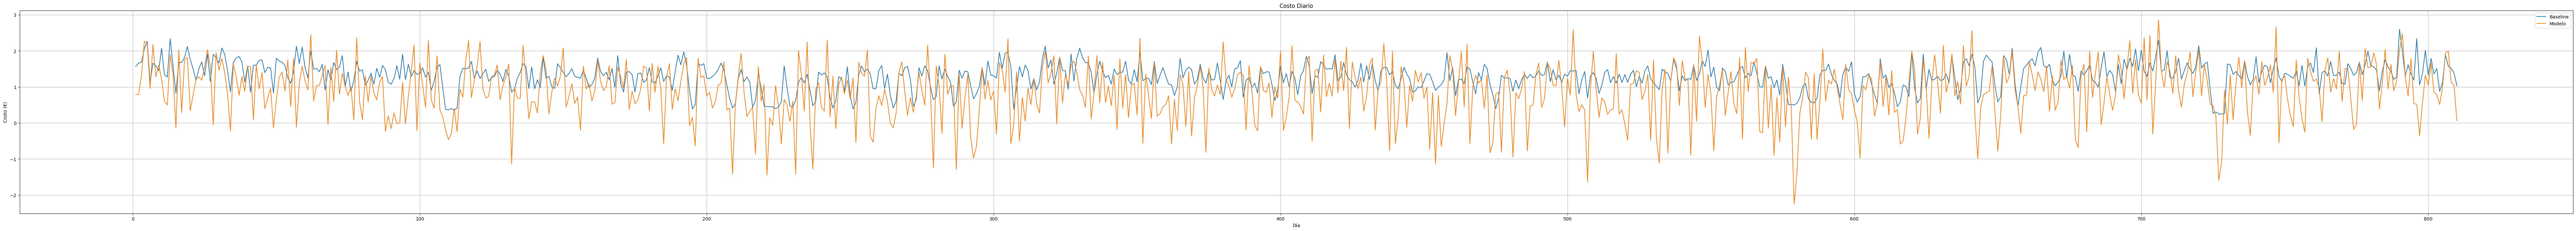

In [5]:
# Gráfica diaria
plt.figure(figsize=(100, 8))
plt.plot(results_df['día'], results_df['baseline'], label='Baseline')
plt.plot(results_df['día'], results_df['modelo'], label='Modelo')
plt.title("Costo Diario")
plt.xlabel("Día")
plt.ylabel("Costo (€)")
plt.legend()
plt.grid(True)
plt.show()